#PREDICCION DE INTROVERTIDILLOS
## EQUIPO:
FLORES ALVAREZ CHRISTIAN ALEXIS

LOPEZ ROQUE ORLANDO

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Cargar el dataset
df = pd.read_csv('personality_datasert.csv')
print(f"Dataset cargado. Dimensiones: {df.shape}")
print(f"Columnas: {df.columns.tolist()}")

Dataset cargado. Dimensiones: (2900, 8)
Columnas: ['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance', 'Going_outside', 'Drained_after_socializing', 'Friends_circle_size', 'Post_frequency', 'Personality']


In [ ]:
# Primeras filas del dataset
print("Primeras 5 filas del dataset:")
print(df.head())

# Información general del dataset
print("\nInformación del dataset:")
print(df.info())

# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(df.describe())

# Verificar valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())

# Verificar tipos de datos
print("\nTipos de datos:")
print(df.dtypes)

Primeras 5 filas del dataset:
   Time_spent_Alone Stage_fear  Social_event_attendance  Going_outside  \
0               4.0         No                      4.0            6.0   
1               9.0        Yes                      0.0            0.0   
2               9.0        Yes                      1.0            2.0   
3               0.0         No                      6.0            7.0   
4               3.0         No                      9.0            4.0   

  Drained_after_socializing  Friends_circle_size  Post_frequency Personality  
0                        No                 13.0             5.0   Extrovert  
1                       Yes                  0.0             3.0   Introvert  
2                       Yes                  5.0             2.0   Introvert  
3                        No                 14.0             8.0   Extrovert  
4                        No                  8.0             5.0   Extrovert  

Información del dataset:
<class 'pandas.core.frame

In [ ]:
# Distribución de la variable objetivo (Personality)
print("\nDistribución de la variable Personality:")
print(df['Personality'].value_counts())
print(f"\nProporciones:")
print(df['Personality'].value_counts(normalize=True))

# Distribución de variables categóricas
categorical_cols = ['Stage_fear', 'Drained_after_socializing', 'Personality']
print("\nDistribución de variables categóricas:")
for col in categorical_cols:
    if col in df.columns:
        print(f"\n{col}:")
        print(df[col].value_counts())
        print("-" * 50)

# Estadísticas por grupo de personalidad
print("\nEstadísticas por grupo de personalidad:")
print(df.groupby('Personality').mean(numeric_only=True))


Distribución de la variable Personality:
Personality
Extrovert    1491
Introvert    1409
Name: count, dtype: int64

Proporciones:
Personality
Extrovert    0.514138
Introvert    0.485862
Name: proportion, dtype: float64

Distribución de variables categóricas:

Stage_fear:
Stage_fear
No     1490
Yes    1410
Name: count, dtype: int64
--------------------------------------------------

Drained_after_socializing:
Drained_after_socializing
No     1493
Yes    1407
Name: count, dtype: int64
--------------------------------------------------

Personality:
Personality
Extrovert    1491
Introvert    1409
Name: count, dtype: int64
--------------------------------------------------

Estadísticas por grupo de personalidad:
             Time_spent_Alone  Social_event_attendance  Going_outside  \
Personality                                                             
Extrovert            2.122869                 5.977850       4.596244   
Introvert            7.027444                 1.831621       

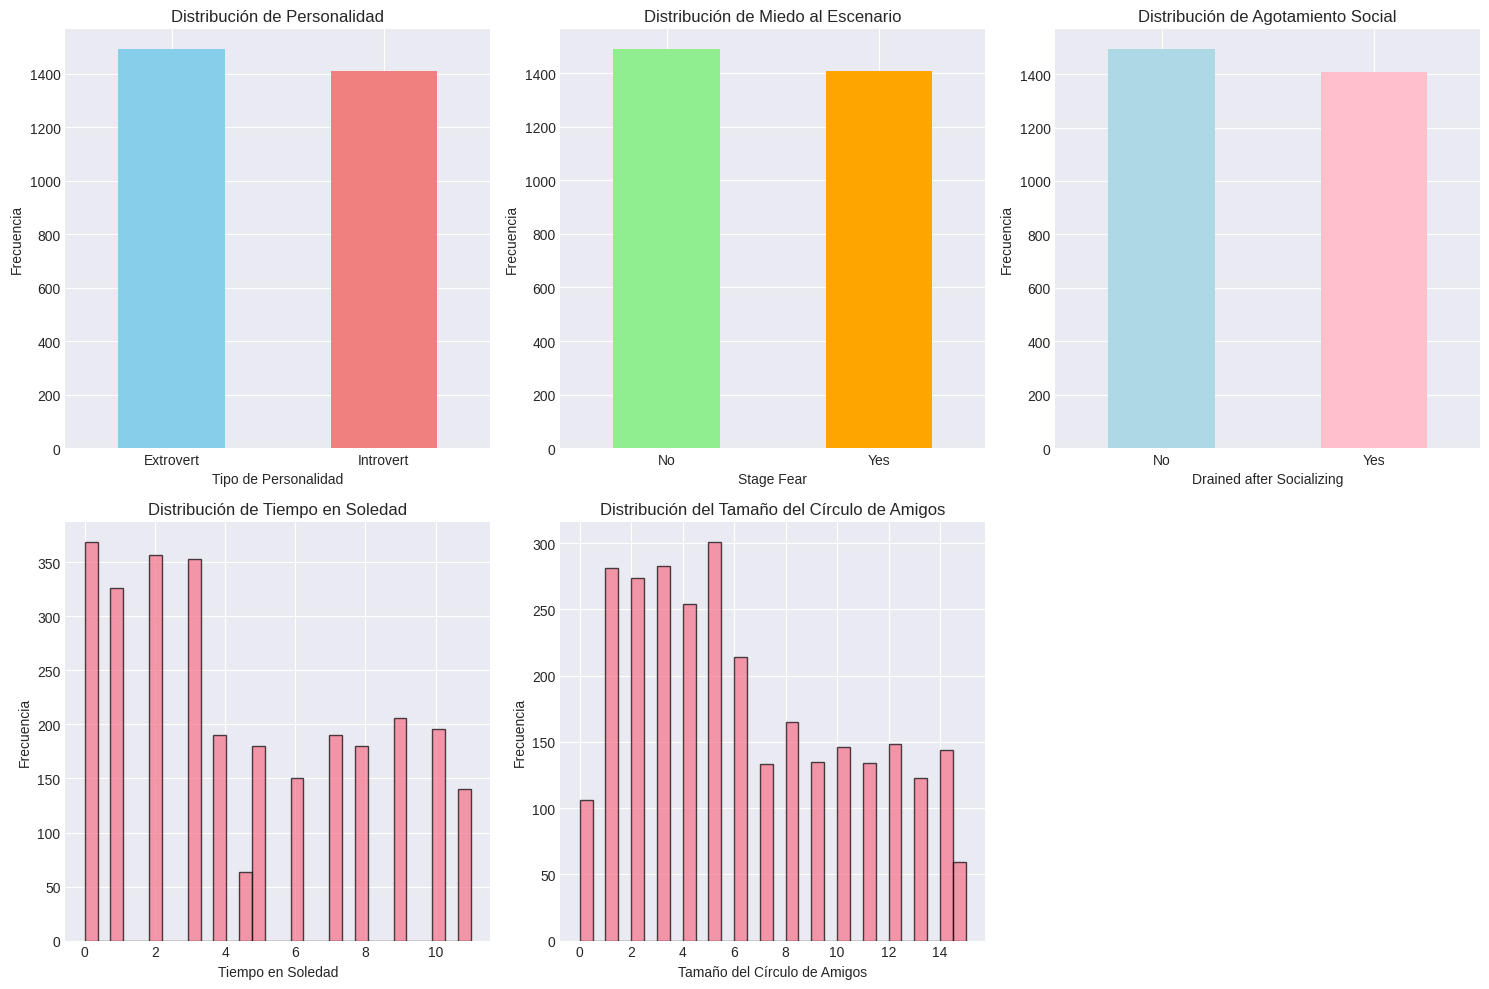

In [ ]:
# Configurar tamaño de figuras
plt.figure(figsize=(15, 10))

# 1. Distribución de la variable objetivo
plt.subplot(2, 3, 1)
df['Personality'].value_counts().plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Distribución de Personalidad')
plt.xlabel('Tipo de Personalidad')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)

# 2. Distribución de Stage_fear
plt.subplot(2, 3, 2)
df['Stage_fear'].value_counts().plot(kind='bar', color=['lightgreen', 'orange'])
plt.title('Distribución de Miedo al Escenario')
plt.xlabel('Stage Fear')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)

# 3. Distribución de Drained_after_socializing
plt.subplot(2, 3, 3)
df['Drained_after_socializing'].value_counts().plot(kind='bar', color=['lightblue', 'pink'])
plt.title('Distribución de Agotamiento Social')
plt.xlabel('Drained after Socializing')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)

# 4. Histograma de Time_spent_Alone
plt.subplot(2, 3, 4)
plt.hist(df['Time_spent_Alone'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribución de Tiempo en Soledad')
plt.xlabel('Tiempo en Soledad')
plt.ylabel('Frecuencia')

# 5. Histograma de Friends_circle_size
plt.subplot(2, 3, 5)
plt.hist(df['Friends_circle_size'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribución del Tamaño del Círculo de Amigos')
plt.xlabel('Tamaño del Círculo de Amigos')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

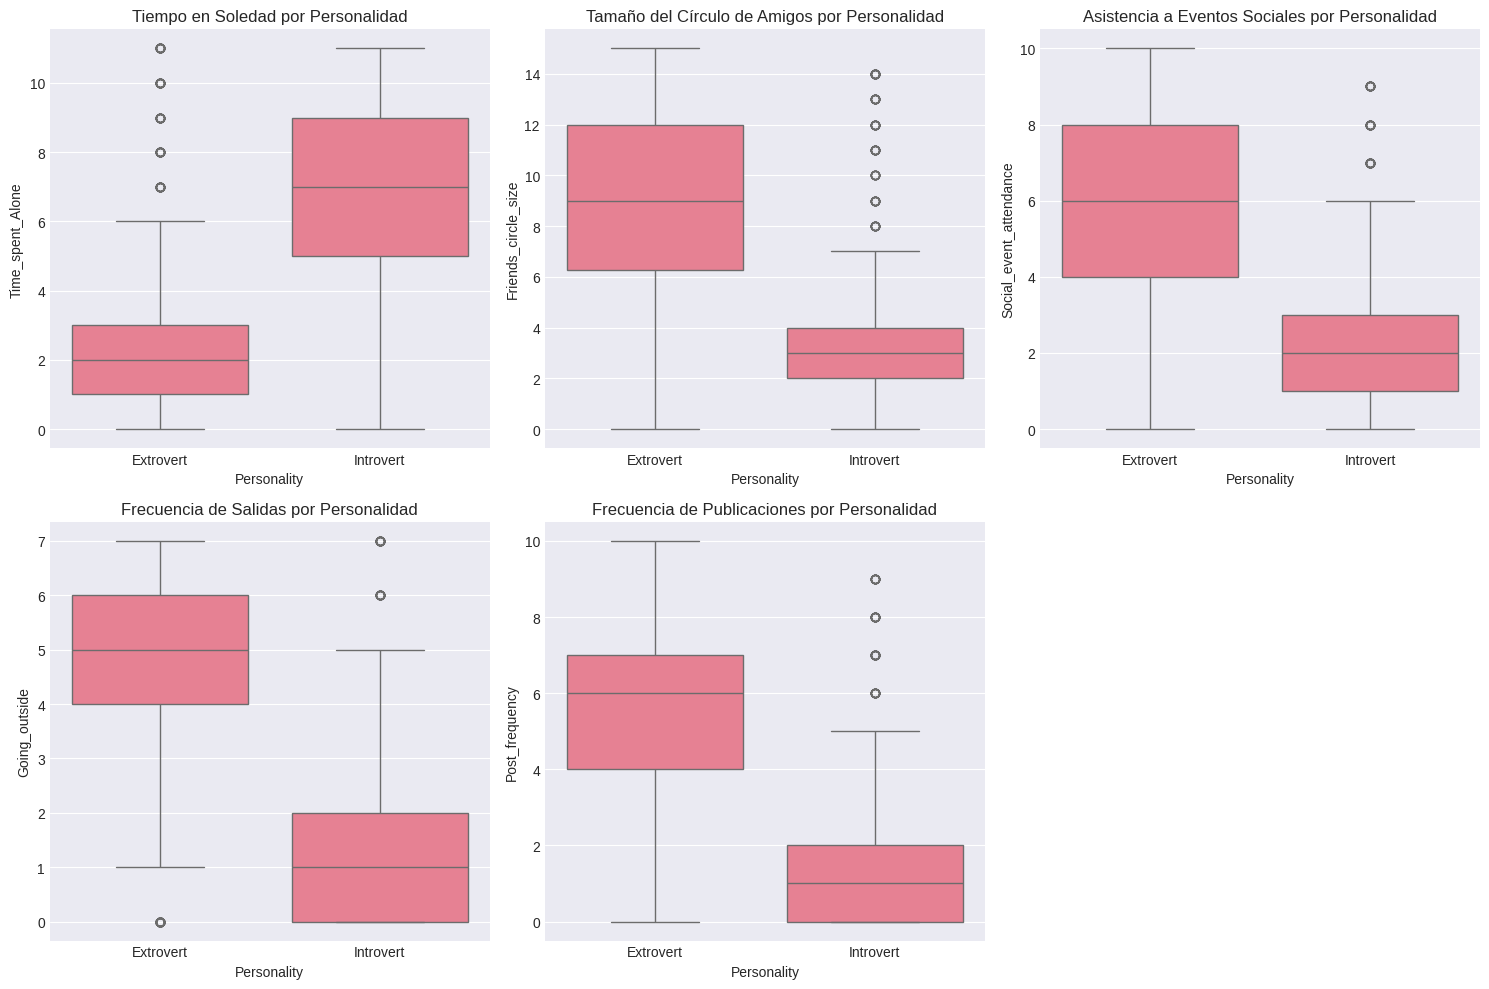

In [ ]:
# Configurar figura
plt.figure(figsize=(15, 10))

# 1. Time_spent_Alone por personalidad
plt.subplot(2, 3, 1)
sns.boxplot(x='Personality', y='Time_spent_Alone', data=df)
plt.title('Tiempo en Soledad por Personalidad')

# 2. Friends_circle_size por personalidad
plt.subplot(2, 3, 2)
sns.boxplot(x='Personality', y='Friends_circle_size', data=df)
plt.title('Tamaño del Círculo de Amigos por Personalidad')

# 3. Social_event_attendance por personalidad
plt.subplot(2, 3, 3)
sns.boxplot(x='Personality', y='Social_event_attendance', data=df)
plt.title('Asistencia a Eventos Sociales por Personalidad')

# 4. Going_outside por personalidad
plt.subplot(2, 3, 4)
sns.boxplot(x='Personality', y='Going_outside', data=df)
plt.title('Frecuencia de Salidas por Personalidad')

# 5. Post_frequency por personalidad
plt.subplot(2, 3, 5)
sns.boxplot(x='Personality', y='Post_frequency', data=df)
plt.title('Frecuencia de Publicaciones por Personalidad')

plt.tight_layout()
plt.show()

In [ ]:
# Copiar el dataframe para no modificar el original
df_processed = df.copy()

# Codificar variables categóricas
label_encoder = LabelEncoder()
categorical_cols_to_encode = ['Stage_fear', 'Drained_after_socializing', 'Personality']

for col in categorical_cols_to_encode:
    if col in df_processed.columns:
        df_processed[f'{col}_encoded'] = label_encoder.fit_transform(df_processed[col])

# Verificar la codificación
print("\nValores únicos después de codificación:")
for col in categorical_cols_to_encode:
    if f'{col}_encoded' in df_processed.columns:
        print(f"\n{col}:")
        print(df_processed[[col, f'{col}_encoded']].drop_duplicates().sort_values(f'{col}_encoded'))

# Separar características (X) y objetivo (y)
# Eliminamos las columnas originales de tipo string y las columnas objetivo sin codificar
columns_to_drop_from_X = ['Personality', 'Personality_encoded', 'Stage_fear', 'Drained_after_socializing']
X = df_processed.drop(columns=columns_to_drop_from_X, axis=1)
y = df_processed['Personality_encoded']

print(f"\nDimensiones de X: {X.shape}")
print(f"Dimensiones de y: {y.shape}")
print(f"Columnas finales de X y sus tipos de datos:\n{X.dtypes}")
print("\nPrimeras filas de X:\n", X.head())


Valores únicos después de codificación:

Stage_fear:
  Stage_fear  Stage_fear_encoded
0         No                   0
1        Yes                   1

Drained_after_socializing:
  Drained_after_socializing  Drained_after_socializing_encoded
0                        No                                  0
1                       Yes                                  1

Personality:
  Personality  Personality_encoded
0   Extrovert                    0
1   Introvert                    1

Dimensiones de X: (2900, 7)
Dimensiones de y: (2900,)
Columnas finales de X y sus tipos de datos:
Time_spent_Alone                     float64
Social_event_attendance              float64
Going_outside                        float64
Friends_circle_size                  float64
Post_frequency                       float64
Stage_fear_encoded                     int64
Drained_after_socializing_encoded      int64
dtype: object

Primeras filas de X:
    Time_spent_Alone  Social_event_attendance  Going_outside 

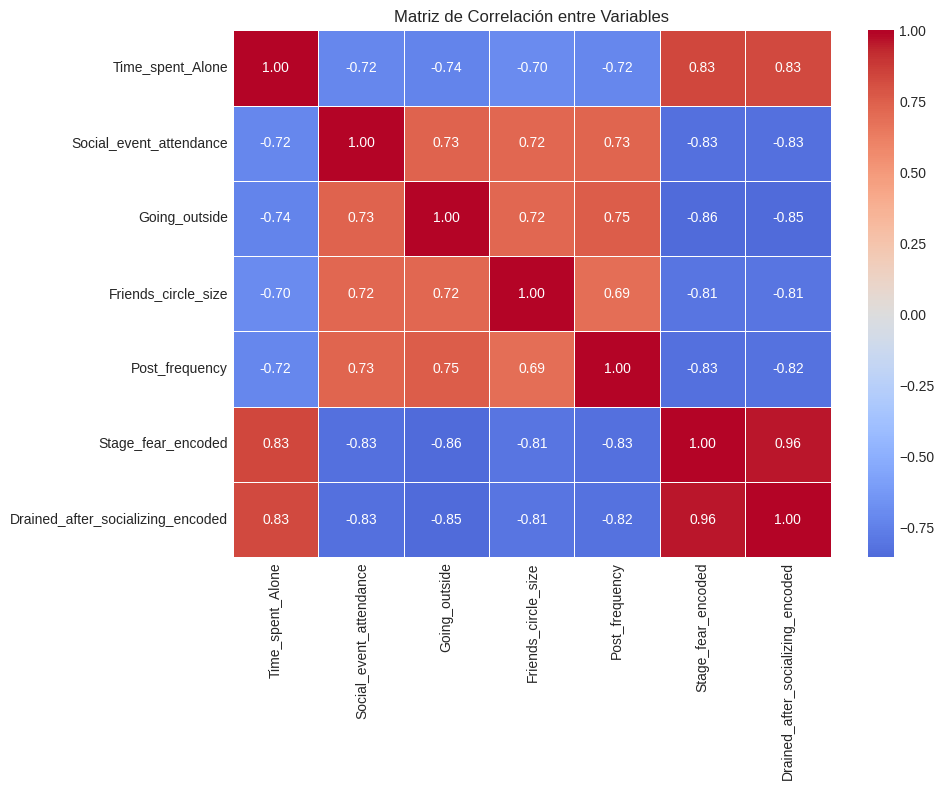


Correlación con la variable objetivo (Personality):
                            Variable  Correlación_con_Personalidad
5                 Stage_fear_encoded                      0.847467
6  Drained_after_socializing_encoded                      0.845388
0                   Time_spent_Alone                      0.712468
3                Friends_circle_size                     -0.687203
4                     Post_frequency                     -0.721062
1            Social_event_attendance                     -0.721520
2                      Going_outside                     -0.739251


In [ ]:
# Calcular matriz de correlación
# Aseguramos que X contenga solo columnas numéricas para el cálculo de correlación
X_numeric = X.select_dtypes(include=np.number)
correlation_matrix = X_numeric.corr()

# Visualizar matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación entre Variables')
plt.tight_layout()
plt.show()

# Correlación con la variable objetivo
if 'Personality_encoded' in df_processed.columns:
    # Usar X_numeric para la correlación con la variable objetivo
    correlations_with_target = pd.DataFrame({
        'Variable': X_numeric.columns,
        'Correlación_con_Personalidad': [X_numeric[col].corr(df_processed['Personality_encoded']) for col in X_numeric.columns]
    }).sort_values('Correlación_con_Personalidad', ascending=False)

    print("\nCorrelación con la variable objetivo (Personality):")
    print(correlations_with_target)

In [ ]:
# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Dimensiones del conjunto de entrenamiento: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Dimensiones del conjunto de prueba: X_test={X_test.shape}, y_test={y_test.shape}")

# Estandarizar variables numéricas
scaler = StandardScaler()
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()

# Aplicar escalado y asegurar que X_train_scaled y X_test_scaled contengan solo columnas numéricas
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train[numeric_cols]), columns=numeric_cols, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test[numeric_cols]), columns=numeric_cols, index=X_test.index)

print("\nPrimeras filas del conjunto de entrenamiento escalado:")
print(X_train_scaled.head())

Dimensiones del conjunto de entrenamiento: X_train=(2320, 7), y_train=(2320,)
Dimensiones del conjunto de prueba: X_test=(580, 7), y_test=(580,)

Primeras filas del conjunto de entrenamiento escalado:
      Time_spent_Alone  Social_event_attendance  Going_outside  \
399          -1.301422                 1.051073       1.795231   
2895         -0.433916                 1.051073       1.344773   
2023         -1.301422                 0.703792       1.344773   
2613         -0.433916                 0.009228       1.344773   
2689          0.144422                -1.379898      -0.907518   

      Friends_circle_size  Post_frequency  Stage_fear_encoded  \
399             -0.544557        0.840945           -0.965258   
2895            -0.074261        0.840945           -0.965258   
2023             1.101479        1.533798           -0.965258   
2613             0.631183       -0.002698           -0.965258   
2689            -0.544557       -0.891188            1.035992   

      Drain

Resultados del Modelo de Regresión Logística:
Precisión (Accuracy): 0.9052

Reporte de Clasificación:
              precision    recall  f1-score   support

   Extrovert       0.92      0.90      0.91       298
   Introvert       0.89      0.91      0.90       282

    accuracy                           0.91       580
   macro avg       0.91      0.91      0.91       580
weighted avg       0.91      0.91      0.91       580



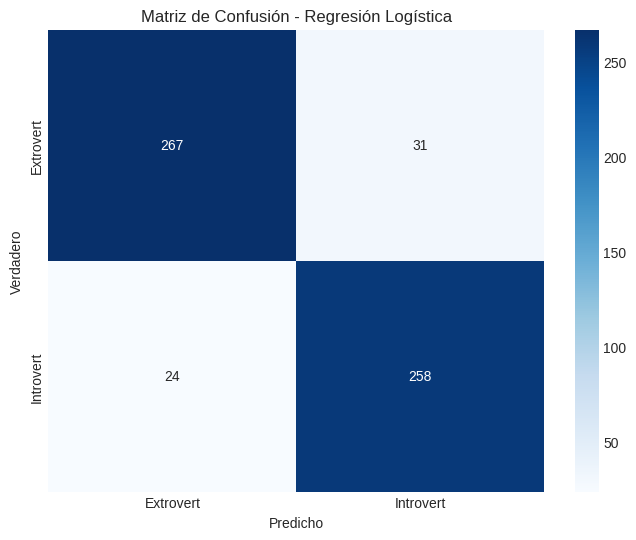

In [ ]:
from sklearn.linear_model import LogisticRegression

# Entrenar modelo de regresión logística
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# Predecir en conjunto de prueba
y_pred = log_reg.predict(X_test_scaled)
y_pred_proba = log_reg.predict_proba(X_test_scaled)[:, 1]

# Evaluar el modelo
print("Resultados del Modelo de Regresión Logística:")
print("=" * 50)
print(f"Precisión (Accuracy): {accuracy_score(y_test, y_pred):.4f}")
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred, target_names=['Extrovert', 'Introvert']))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Extrovert', 'Introvert'],
            yticklabels=['Extrovert', 'Introvert'])
plt.title('Matriz de Confusión - Regresión Logística')
plt.ylabel('Verdadero')
plt.xlabel('Predicho')
plt.show()

Importancia de características (Regresión Logística):
                      Característica  Importancia
6  Drained_after_socializing_encoded     1.343953
5                 Stage_fear_encoded     1.307149
3                Friends_circle_size     0.243600
4                     Post_frequency     0.237954
2                      Going_outside     0.124023
0                   Time_spent_Alone     0.088664
1            Social_event_attendance     0.028477


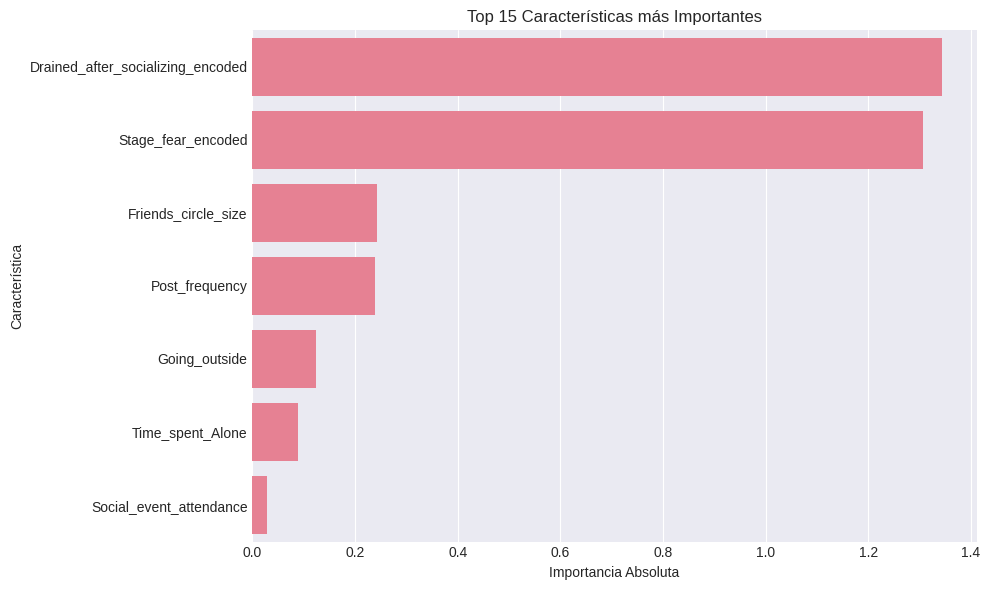

In [ ]:
# Obtener importancia de características del modelo de regresión logística
feature_importance = pd.DataFrame({
    'Característica': X.columns,
    'Importancia': np.abs(log_reg.coef_[0])
}).sort_values('Importancia', ascending=False)

print("Importancia de características (Regresión Logística):")
print(feature_importance)

# Visualizar importancia de características
plt.figure(figsize=(10, 6))
sns.barplot(x='Importancia', y='Característica', data=feature_importance.head(15))
plt.title('Top 15 Características más Importantes')
plt.xlabel('Importancia Absoluta')
plt.tight_layout()
plt.show()

Resultados del Modelo Random Forest:
Precisión (Accuracy): 0.9017

Reporte de Clasificación:
              precision    recall  f1-score   support

   Introvert       0.91      0.90      0.90       298
   Extrovert       0.89      0.91      0.90       282

    accuracy                           0.90       580
   macro avg       0.90      0.90      0.90       580
weighted avg       0.90      0.90      0.90       580


Importancia de características (Random Forest):
              Característica  Importancia
6             Post_frequency     0.226045
5        Friends_circle_size     0.172168
1                 Stage_fear     0.151353
0           Time_spent_Alone     0.149061
4  Drained_after_socializing     0.126722
2    Social_event_attendance     0.113677
3              Going_outside     0.060974


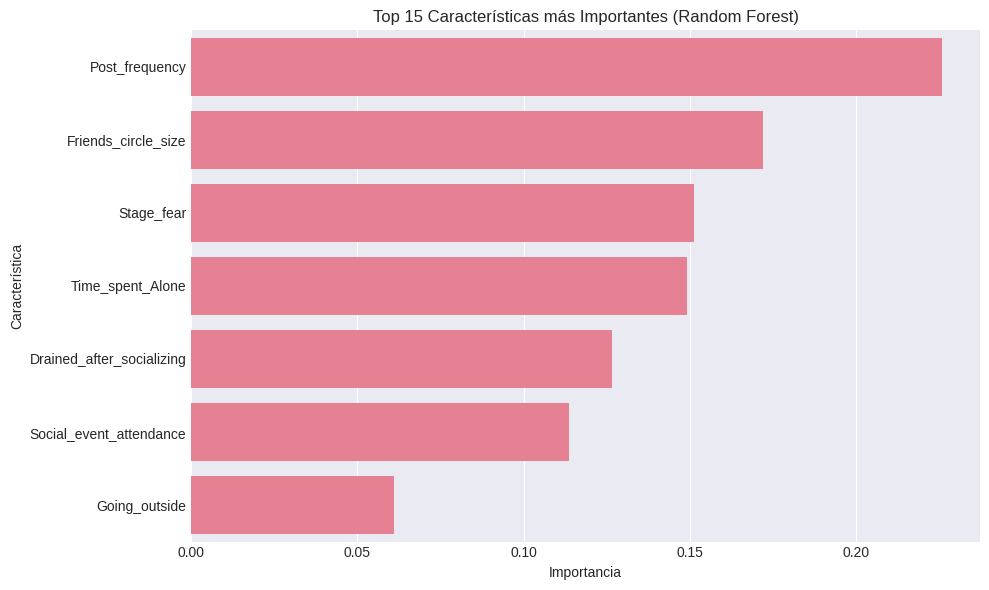

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Entrenar modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predecir y evaluar
y_pred_rf = rf_model.predict(X_test_scaled)

print("Resultados del Modelo Random Forest:")
print("=" * 50)
print(f"Precisión (Accuracy): {accuracy_score(y_test, y_pred_rf):.4f}")
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_rf, target_names=['Introvert', 'Extrovert']))

# Importancia de características en Random Forest
feature_importance_rf = pd.DataFrame({
    'Característica': X.columns,
    'Importancia': rf_model.feature_importances_
}).sort_values('Importancia', ascending=False)

print("\nImportancia de características (Random Forest):")
print(feature_importance_rf)

# Visualizar importancia
plt.figure(figsize=(10, 6))
sns.barplot(x='Importancia', y='Característica', data=feature_importance_rf.head(15))
plt.title('Top 15 Características más Importantes (Random Forest)')
plt.xlabel('Importancia')
plt.tight_layout()
plt.show()

In [ ]:
# Comparar ambos modelos
models_comparison = pd.DataFrame({
    'Modelo': ['Regresión Logística', 'Random Forest'],
    'Precisión': [
        accuracy_score(y_test, y_pred),
        accuracy_score(y_test, y_pred_rf)
    ]
})

print("Comparación de Modelos:")
print(models_comparison)

# Análisis de errores
errors_df = X_test.copy()
errors_df['True_Label'] = y_test
errors_df['Predicted_Label'] = y_pred
errors_df['Predicted_Label_RF'] = y_pred_rf
errors_df['Correct_LR'] = (errors_df['True_Label'] == errors_df['Predicted_Label'])
errors_df['Correct_RF'] = (errors_df['True_Label'] == errors_df['Predicted_Label_RF'])

print(f"\nErrores de clasificación (Regresión Logística): {sum(~errors_df['Correct_LR'])}/{len(errors_df)}")
print(f"Errores de clasificación (Random Forest): {sum(~errors_df['Correct_RF'])}/{len(errors_df)}")

# Análisis de casos donde ambos modelos fallaron
both_wrong = errors_df[(~errors_df['Correct_LR']) & (~errors_df['Correct_RF'])]
print(f"\nCasos donde ambos modelos fallaron: {len(both_wrong)}")

if len(both_wrong) > 0:
    print("\nEstadísticas de casos difíciles (ambos modelos fallaron):")
    print(both_wrong.drop(['True_Label', 'Predicted_Label', 'Predicted_Label_RF', 'Correct_LR', 'Correct_RF'],
                          axis=1, errors='ignore').describe())

Comparación de Modelos:
                Modelo  Precisión
0  Regresión Logística   0.905172
1        Random Forest   0.901724

Errores de clasificación (Regresión Logística): 55/580
Errores de clasificación (Random Forest): 57/580

Casos donde ambos modelos fallaron: 45

Estadísticas de casos difíciles (ambos modelos fallaron):
       Time_spent_Alone  Social_event_attendance  Going_outside  \
count         45.000000                45.000000      45.000000   
mean           6.111111                 3.110297       2.577778   
std            4.035199                 2.715195       2.641357   
min            0.000000                 0.000000       0.000000   
25%            2.000000                 1.000000       0.000000   
50%            7.000000                 2.000000       2.000000   
75%           10.000000                 6.000000       5.000000   
max           11.000000                 8.000000       7.000000   

       Friends_circle_size  Post_frequency  Stage_fear_encoded  \


In [ ]:
print("\n" + "="*60)
print("ANÁLISIS DE VARIABLES CUALITATIVAS: ORDINALES vs NOMINALES")
print("="*60)

# Análisis de naturaleza de variables categóricas
print("\nVariables categóricas en el dataset:")
categorical_vars = ['Stage_fear', 'Drained_after_socializing', 'Personality']

for var in categorical_vars:
    unique_vals = df[var].unique()
    print(f"\n{var}:")
    print(f"  - Valores únicos: {unique_vals}")
    print(f"  - Tipo: {'Nominal (sin orden natural)' if var != 'Personality' else 'Binaria (target)'}")

    # Para Stage_fear y Drained_after_socializing
    if var in ['Stage_fear', 'Drained_after_socializing']:
        print(f"  - Análisis: Variable binaria {'No' if var == 'Stage_fear' else 'No'}-ordenada")
        print(f"  - Distribución:")
        print(df[var].value_counts())


ANÁLISIS DE VARIABLES CUALITATIVAS: ORDINALES vs NOMINALES

Variables categóricas en el dataset:

Stage_fear:
  - Valores únicos: ['No' 'Yes']
  - Tipo: Nominal (sin orden natural)
  - Análisis: Variable binaria No-ordenada
  - Distribución:
Stage_fear
No     1490
Yes    1410
Name: count, dtype: int64

Drained_after_socializing:
  - Valores únicos: ['No' 'Yes']
  - Tipo: Nominal (sin orden natural)
  - Análisis: Variable binaria No-ordenada
  - Distribución:
Drained_after_socializing
No     1493
Yes    1407
Name: count, dtype: int64

Personality:
  - Valores únicos: ['Extrovert' 'Introvert']
  - Tipo: Binaria (target)


In [ ]:
print("\n" + "="*60)
print("REDUCCIÓN DE DIMENSIONALIDAD - VISUALIZACIÓN DE PATRONES")
print("="*60)

# Preparar datos para reducción dimensional
df_encoded = df.copy()
le = LabelEncoder()
df_encoded['Stage_fear'] = le.fit_transform(df_encoded['Stage_fear'])
df_encoded['Drained_after_socializing'] = le.fit_transform(df_encoded['Drained_after_socializing'])
df_encoded['Personality'] = le.fit_transform(df_encoded['Personality'])

# Separar características
X_all = df_encoded.drop('Personality', axis=1)
y_all = df_encoded['Personality']

# Estandarizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_all)

print(f"Datos preparados: {X_scaled.shape[0]} muestras, {X_scaled.shape[1]} características")


REDUCCIÓN DE DIMENSIONALIDAD - VISUALIZACIÓN DE PATRONES
Datos preparados: 2900 muestras, 7 características



ANÁLISIS DE COMPONENTES PRINCIPALES (PCA)
Varianza explicada por componentes: [0.8169677  0.04537115]
Varianza total explicada: 86.23%


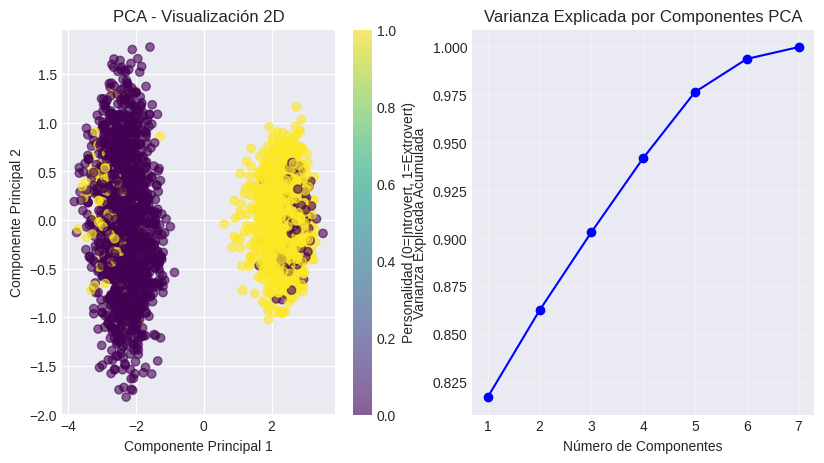

In [ ]:
from sklearn.decomposition import PCA

print("\nANÁLISIS DE COMPONENTES PRINCIPALES (PCA)")
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print(f"Varianza explicada por componentes: {pca.explained_variance_ratio_}")
print(f"Varianza total explicada: {sum(pca.explained_variance_ratio_):.2%}")

# Visualizar PCA
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_all, cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Personalidad (0=Introvert, 1=Extrovert)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA - Visualización 2D')

# Gráfico de varianza explicada
plt.subplot(1, 3, 2)
pca_full = PCA().fit(X_scaled)
plt.plot(range(1, len(pca_full.explained_variance_ratio_) + 1),
         np.cumsum(pca_full.explained_variance_ratio_), 'bo-')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Varianza Explicada por Componentes PCA')
plt.grid(True, alpha=0.3)


ANÁLISIS T-SNE (t-Distributed Stochastic Neighbor Embedding)


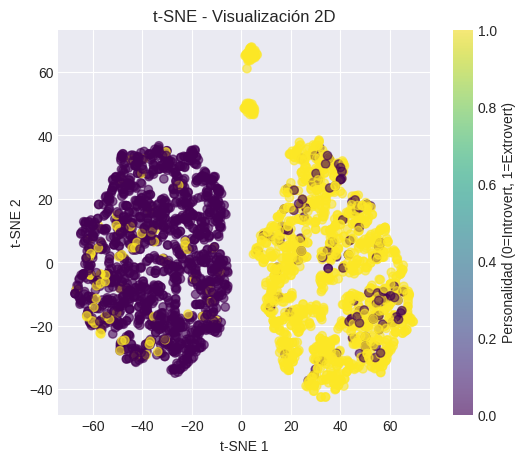

In [ ]:
from sklearn.manifold import TSNE

print("\nANÁLISIS T-SNE (t-Distributed Stochastic Neighbor Embedding)")
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(6, 5))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_all, cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Personalidad (0=Introvert, 1=Extrovert)')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('t-SNE - Visualización 2D')
plt.show()

In [ ]:

print("\n" + "="*60)
print("PIPELINE DE PREPROCESAMIENTO INTEGRADO")
print("="*60)

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

# Separar datos
X = df.drop('Personality', axis=1)
y = le.fit_transform(df['Personality'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Definir columnas por tipo
numeric_features = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside',
                   'Friends_circle_size', 'Post_frequency']
categorical_features = ['Stage_fear', 'Drained_after_socializing']

# Crear preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

print("Pipeline creado exitosamente:")
print(f"  - Características numéricas: {numeric_features}")
print(f"  - Características categóricas: {categorical_features}")
print(f"  - Tamaño entrenamiento: {X_train.shape}")
print(f"  - Tamaño prueba: {X_test.shape}")


PIPELINE DE PREPROCESAMIENTO INTEGRADO
Pipeline creado exitosamente:
  - Características numéricas: ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']
  - Características categóricas: ['Stage_fear', 'Drained_after_socializing']
  - Tamaño entrenamiento: (2320, 7)
  - Tamaño prueba: (580, 7)


In [ ]:
print("\n" + "="*60)
print("BÚSQUEDA DE HIPERPARÁMETROS Y SELECCIÓN DE MODELO")
print("="*60)

from sklearn.svm import SVC

# Definir modelos y parámetros para búsqueda
models = {
    'LogisticRegression': {
        'pipeline': Pipeline(
            [('preprocessor', preprocessor),
             ('classifier', LogisticRegression(random_state=42, max_iter=1000))
            ]),
        'params': {
            'classifier__C': [0.01, 0.1, 1, 10, 100],
            'classifier__penalty': ['l2'],
            'classifier__solver': ['lbfgs', 'liblinear']
        }
    },
    'RandomForest': {
        'pipeline': Pipeline(
            [('preprocessor', preprocessor),
             ('classifier', RandomForestClassifier(random_state=42))
            ]),
        'params': {
            'classifier__n_estimators': [100, 200],
            'classifier__max_depth': [10, 20, None],
            'classifier__min_samples_split': [2, 5],
            'classifier__min_samples_leaf': [1, 2]
        }
    },
    'SVM': {
        'pipeline': Pipeline(
            [('preprocessor', preprocessor),
             ('classifier', SVC(random_state=42, probability=True))
            ]),
        'params': {
            'classifier__C': [0.1, 1, 10],
            'classifier__kernel': ['linear', 'rbf'],
            'classifier__gamma': ['scale', 'auto']
        }
    }
}

print("Modelos configurados para búsqueda:")
for model_name in models.keys():
    print(f"  - {model_name}")


BÚSQUEDA DE HIPERPARÁMETROS Y SELECCIÓN DE MODELO
Modelos configurados para búsqueda:
  - LogisticRegression
  - RandomForest
  - SVM



Iniciando GridSearchCV para LogisticRegression
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Finalizado LogisticRegression. Mejor score: 0.9388
Mejores parámetros: {'classifier__C': 0.01, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}

Iniciando GridSearchCV para RandomForest
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Finalizado RandomForest. Mejor score: 0.9388
Mejores parámetros: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}

Iniciando GridSearchCV para SVM
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Finalizado SVM. Mejor score: 0.9388
Mejores parámetros: {'classifier__C': 0.1, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf'}

RESUMEN DE RESULTADOS DE LA BÚSQUEDA DE HIPERPARÁMETROS

Modelo: LogisticRegression
  Mejor Precisión (CV): 0.9388
  Mejores Parámetros: {'classifier__C': 0.01, 'classifier__penalty': 'l2', 'classifie

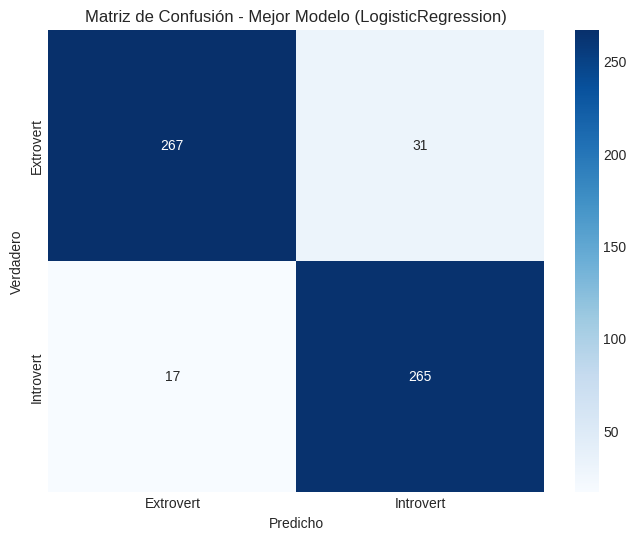

In [ ]:
from sklearn.model_selection import GridSearchCV

results = {}

for model_name, config in models.items():
    print(f"\n{'='*50}")
    print(f"Iniciando GridSearchCV para {model_name}")
    print(f"{'='*50}")

    grid_search = GridSearchCV(config['pipeline'], config['params'], cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)

    results[model_name] = {
        'best_estimator': grid_search.best_estimator_,
        'best_params': grid_search.best_params_,
        'best_score': grid_search.best_score_,
        'cv_results': grid_search.cv_results_
    }

    print(f"Finalizado {model_name}. Mejor score: {results[model_name]['best_score']:.4f}")
    print(f"Mejores parámetros: {results[model_name]['best_params']}")

print("\n" + "="*60)
print("RESUMEN DE RESULTADOS DE LA BÚSQUEDA DE HIPERPARÁMETROS")
print("="*60)

for model_name, res in results.items():
    print(f"\nModelo: {model_name}")
    print(f"  Mejor Precisión (CV): {res['best_score']:.4f}")
    print(f"  Mejores Parámetros: {res['best_params']}")

# Seleccionar el mejor modelo basado en el score de validación cruzada
best_model_name = max(results, key=lambda name: results[name]['best_score'])
best_model = results[best_model_name]['best_estimator']

print(f"\nEl mejor modelo seleccionado es: {best_model_name} con una precisión de CV de {results[best_model_name]['best_score']:.4f}")

# Evaluar el mejor modelo en el conjunto de prueba
y_pred_best = best_model.predict(X_test)
print(f"\nPrecisión del mejor modelo en el conjunto de prueba: {accuracy_score(y_test, y_pred_best):.4f}")
print("\nReporte de Clasificación del mejor modelo en el conjunto de prueba:")
print(classification_report(y_test, y_pred_best, target_names=['Extrovert', 'Introvert']))

# Matriz de confusión del mejor modelo
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Extrovert', 'Introvert'],
            yticklabels=['Extrovert', 'Introvert'])
plt.title(f'Matriz de Confusión - Mejor Modelo ({best_model_name})')
plt.ylabel('Verdadero')
plt.xlabel('Predicho')
plt.show()

In [ ]:
print("\n" + "="*60)
print("EVALUACIÓN COMPLETA DEL MODELO FINAL")
print("="*60)

# Entrenar modelo final con todos los datos de entrenamiento
best_model.fit(X_train, y_train)

# Predecir en conjunto de prueba
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Métricas de evaluación
print("\nMÉTRICAS DE EVALUACIÓN EN TEST:")
print("-" * 40)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"\nReporte de Clasificación:")
print(classification_report(y_test, y_pred, target_names=['Introvert', 'Extrovert']))


EVALUACIÓN COMPLETA DEL MODELO FINAL

MÉTRICAS DE EVALUACIÓN EN TEST:
----------------------------------------
Accuracy: 0.9172

Reporte de Clasificación:
              precision    recall  f1-score   support

   Introvert       0.94      0.90      0.92       298
   Extrovert       0.90      0.94      0.92       282

    accuracy                           0.92       580
   macro avg       0.92      0.92      0.92       580
weighted avg       0.92      0.92      0.92       580



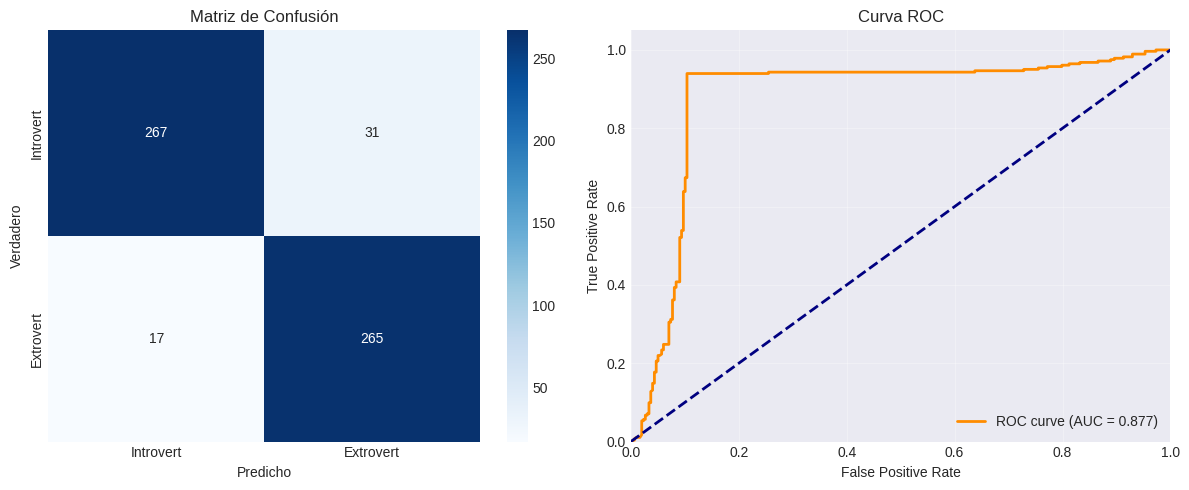


AUC-ROC: 0.8766


In [ ]:
from sklearn.metrics import roc_curve, auc

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Visualización
plt.figure(figsize=(12, 5))

# Matriz de confusión
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Introvert', 'Extrovert'],
            yticklabels=['Introvert', 'Extrovert'])
plt.title('Matriz de Confusión')
plt.ylabel('Verdadero')
plt.xlabel('Predicho')

# Curva ROC
plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nAUC-ROC: {roc_auc:.4f}")

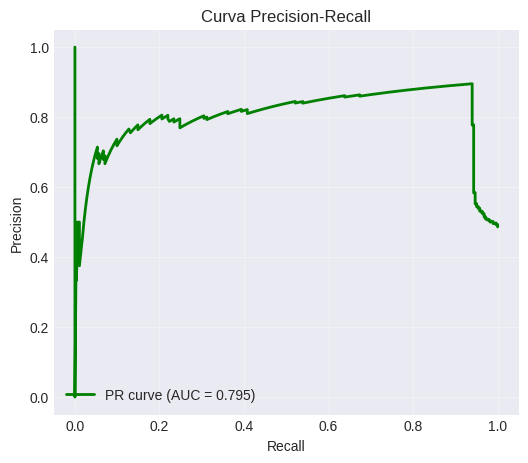

AUC Precision-Recall: 0.7947


In [ ]:
from sklearn.metrics import precision_recall_curve

# Curva Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)

plt.figure(figsize=(6, 5))
plt.plot(recall, precision, color='green', lw=2, label=f'PR curve (AUC = {pr_auc:.3f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall')
plt.legend(loc="lower left")
plt.grid(True, alpha=0.3)
plt.show()

print(f"AUC Precision-Recall: {pr_auc:.4f}")


CURVAS DE APRENDIZAJE


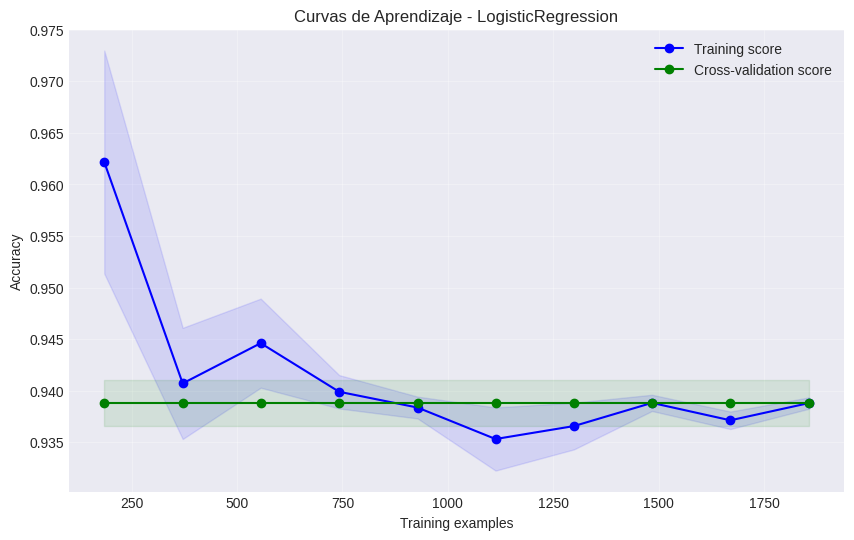


ANÁLISIS DE CURVAS DE APRENDIZAJE:
- Comportamiento adecuado: convergencia con buen score de validation


In [ ]:
from sklearn.model_selection import learning_curve

print("\n" + "="*60)
print("CURVAS DE APRENDIZAJE")
print("="*60)

# Calcular curvas de aprendizaje
train_sizes, train_scores, val_scores = learning_curve(
    best_model, X_train, y_train,
    cv=5,  # 5-fold cross validation
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='accuracy'
)

# Calcular medias y desviaciones estándar
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Graficar curvas de aprendizaje
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training score')
plt.plot(train_sizes, val_mean, 'o-', color='green', label='Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color='green')
plt.xlabel('Training examples')
plt.ylabel('Accuracy')
plt.title(f'Curvas de Aprendizaje - {best_model_name}')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.show()

# Análisis de las curvas de aprendizaje
print("\nANÁLISIS DE CURVAS DE APRENDIZAJE:")
if val_mean[-1] < train_mean[-1] - 0.1:
    print("- Posible sobreajuste: diferencia significativa entre train y validation")
elif val_mean[-1] < 0.7:
    print("- Posible subajuste: scores bajos en ambos conjuntos")
else:
    print("- Comportamiento adecuado: convergencia con buen score de validation")


VALIDACIÓN CRUZADA COMPLETA (10-FOLD)
Scores de validación cruzada (10-fold):
  Fold 1: 0.9569
  Fold 2: 0.9267
  Fold 3: 0.9440
  Fold 4: 0.9267
  Fold 5: 0.9397
  Fold 6: 0.9397
  Fold 7: 0.9138
  Fold 8: 0.9612
  Fold 9: 0.9310
  Fold 10: 0.9483

Media de CV scores: 0.9388
Desviación estándar: 0.0139
Rango: [0.9138, 0.9612]


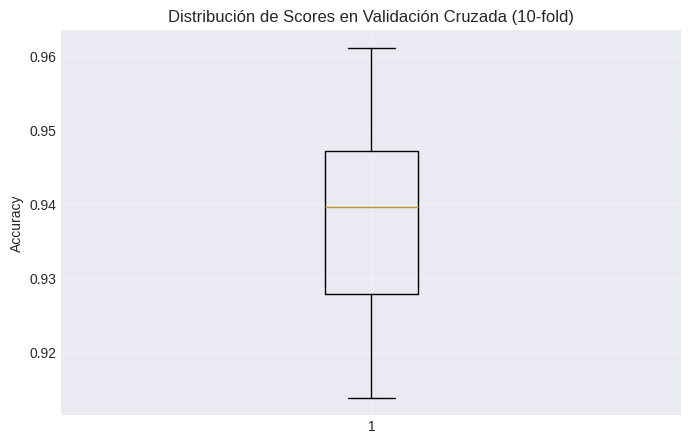

In [ ]:
from sklearn.model_selection import cross_val_score

print("\n" + "="*60)
print("VALIDACIÓN CRUZADA COMPLETA (10-FOLD)")
print("="*60)

# Validación cruzada completa
cv_scores = cross_val_score(best_model, X_train, y_train, cv=10, scoring='accuracy')

print(f"Scores de validación cruzada (10-fold):")
for i, score in enumerate(cv_scores, 1):
    print(f"  Fold {i}: {score:.4f}")

print(f"\nMedia de CV scores: {np.mean(cv_scores):.4f}")
print(f"Desviación estándar: {np.std(cv_scores):.4f}")
print(f"Rango: [{np.min(cv_scores):.4f}, {np.max(cv_scores):.4f}]")

# Boxplot de scores de CV
plt.figure(figsize=(8, 5))
plt.boxplot(cv_scores)
plt.title('Distribución de Scores en Validación Cruzada (10-fold)')
plt.ylabel('Accuracy')
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
print("\n" + "="*60)
print("IMPORTANCIA DE CARACTERÍSTICAS")
print("="*60)

# Obtener nombres de características después del preprocesamiento
if hasattr(best_model.named_steps['classifier'], 'feature_importances_'):
    # Para modelos como RandomForest
    feature_importances = best_model.named_steps['classifier'].feature_importances_

    # Obtener nombres de características del preprocesador
    feature_names = numeric_features.copy()

    # Añadir características categóricas codificadas
    cat_encoder = best_model.named_steps['preprocessor'].transformers_[1][1]
    if hasattr(cat_encoder, 'get_feature_names_out'):
        cat_features = cat_encoder.get_feature_names_out(categorical_features)
        feature_names.extend(cat_features)

    # Crear dataframe de importancia
    importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': feature_importances
    }).sort_values('importance', ascending=False)

    print("\nTop 10 características más importantes:")
    print(importance_df.head(10).to_string(index=False))

    # Visualizar
    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=importance_df.head(15))
    plt.title(f'Top 15 Características más Importantes - {best_model_name}')
    plt.xlabel('Importancia')
    plt.tight_layout()
    plt.show()

elif hasattr(best_model.named_steps['classifier'], 'coef_'):
    # Para modelos como Logistic Regression
    coefficients = best_model.named_steps['classifier'].coef_[0]

    # Obtener nombres de características
    feature_names = numeric_features.copy()
    cat_encoder = best_model.named_steps['preprocessor'].transformers_[1][1]
    if hasattr(cat_encoder, 'get_feature_names_out'):
        cat_features = cat_encoder.get_feature_names_out(categorical_features)
        feature_names.extend(cat_features)

    # Crear dataframe
    coef_df = pd.DataFrame({
        'feature': feature_names,
        'coefficient': coefficients,
        'abs_coefficient': np.abs(coefficients)
    }).sort_values('abs_coefficient', ascending=False)

    print("\nTop 10 coeficientes más importantes (valor absoluto):")
    print(coef_df.head(10).to_string(index=False))


IMPORTANCIA DE CARACTERÍSTICAS

Top 10 coeficientes más importantes (valor absoluto):
                      feature  coefficient  abs_coefficient
                Going_outside    -0.488996         0.488996
Drained_after_socializing_Yes     0.475212         0.475212
               Post_frequency    -0.468164         0.468164
               Stage_fear_Yes     0.466481         0.466481
      Social_event_attendance    -0.411318         0.411318
             Time_spent_Alone     0.396375         0.396375
          Friends_circle_size    -0.326522         0.326522


In [ ]:
print("\n" + "="*60)
print("RESUMEN FINAL DEL ANÁLISIS")
print("="*60)

print("\nPROBLEMA IDENTIFICADO:")
print("- Tipo: Clasificación binaria")
print("- Target: Personality (Introvert/Extrovert)")
print("- Justificación: Predecir categoría discreta basada en características psicológicas/sociales")

print("\nMODELO FINAL SELECCIONADO:")
print(f"- Algoritmo: {best_model_name}")
print(f"- Accuracy en test: {accuracy_score(y_test, y_pred):.4f}")
print(f"- AUC-ROC: {roc_auc:.4f}")
print(f"- Validación cruzada (10-fold): {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")

print("\nCALIDAD DEL MODELO:")
accuracy_test = accuracy_score(y_test, y_pred)
if accuracy_test > 0.8:
    print("- Excelente: Accuracy > 0.8")
elif accuracy_test > 0.7:
    print("- Bueno: Accuracy > 0.7")
else:
    print("- Aceptable: Podría mejorarse con más datos o características")



RESUMEN FINAL DEL ANÁLISIS

PROBLEMA IDENTIFICADO:
- Tipo: Clasificación binaria
- Target: Personality (Introvert/Extrovert)
- Justificación: Predecir categoría discreta basada en características psicológicas/sociales

MODELO FINAL SELECCIONADO:
- Algoritmo: LogisticRegression
- Accuracy en test: 0.9172
- AUC-ROC: 0.8766
- Validación cruzada (10-fold): 0.9388 ± 0.0139

CALIDAD DEL MODELO:
- Excelente: Accuracy > 0.8
